# Problem Statement

In [ ]:
Risks that is associated with the bank’s loan approval/denial:

a)If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

b)If the applicant is not likely to repay the loan, i.e. he/she is likely to default, 
then approving the loan may lead to a financial loss for the company


# Objective

In [ ]:
To identify patterns using EDA which indicate if a person is likely to default, which may be used for 
taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at 
a higher interest rate, etc.

# Code

In [1]:
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data from local
df=pd.read_csv("C:/Users/Janani Ramaswamy/Desktop/Upgrad/Case Study/Lending Club Case Study/Data/loan/loan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Summary of the given information

In [3]:
#head generally returns top 5 rows of the data set. You can mention any value of n
df.head(2)
#returns the number of rows, number of columns
print(df.shape)

(39717, 111)


# Data Cleaning

In [4]:
#Eliminate the unwanted data 
#1.Out of the three loan statuses, Fully Paid/ Charged Off/ Current, Current is not required for our analysis. 
#Because, we cannot conclude on anything using "Current" data
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [5]:
#Once the rows related to "Current" are removed, we are left with 38577 rows.
df=df[df['loan_status']!='Current']
print("Total number of rows :",len(df))

Total number of rows : 38577


In [6]:
#2. To check if any column has null or blank value
#a.(df.isnull().sum()*100)/len(df)
#b.df.isnull().mean()
(df.isnull().sum()*100)/len(df)
#3. Total percentage of null values in the data
#(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
#We can print the list of columns that has NA and then remove it or 
#print(df.columns[df.isna().all()].toList())
#Remove the columns that has blank or NA columns
df =df.dropna(axis=1,how="all")#Note: axis =0 is rows. axis=1 is columns
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [8]:
#3.Deleting all the columns that has single value in all the rows 
for col in df.columns:
    if df[col].nunique(dropna=True) ==1:
        print(col)
        df=df.drop(col,axis=1)
df

pymnt_plan
initial_list_status
out_prncp
out_prncp_inv
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [9]:
#3b. Check if the values are unique
#This tells us that all the rows of these columns have unique values
unique_cols =[col for col in df.columns if df[col].nunique()==len(df)]
unique_cols

['id', 'member_id', 'url']

In [10]:
#member_id and url can be dropped since its enough if we just have one column of unique data
df.drop(['url','member_id'],axis=1,inplace=True)

In [13]:
#4. Drop all the other rows that would not contribute to our analysis
df.drop(["title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [16]:
#Once all the irrelevant data are dropped off, check for the number of rows and columns
df.shape

(38577, 23)

In [17]:
#Once all the irrelevant data are dropped off, check for the columns that are remaining on our dataset
df.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

# Data Conversion

In [18]:
#Check for the data type of all the columns that exist in our dataset. identify the columns that need to be converted
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [19]:
#1. Term value needs to be converted from object to int. 
df['term'].value_counts()
#The value of term is either 36 months or 60 months. 

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [ ]:
#removing the months keyword from term and converting it into an integer
def convertTerm(term):
    return int(term.strip().split()[0])

df['term'] = df['term'].apply(convertTerm)

In [24]:
df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [25]:
#2. Int_rate (Interest Rate) value needs to be converted from object to float. 
df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [26]:
df['int_rate']=df['int_rate'].str.strip('%').astype(float)

In [27]:
df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [70]:
#4.converting issue_d to date type. Only then, would we be able to derive two new columns - issue_year and issue_month
df['issue_d'] = pd.to_datetime(df.issue_d,format='%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39711   2007-07-01
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 32457, dtype: datetime64[ns]

# Derived Columns

In [71]:
#Creating derived columns for issue month and issue year from issue date. This is useful for our further analysis
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_month']=pd.DatetimeIndex(df['issue_d']).month

# Univariate Analysis

In [28]:
#Bucketting Loan Amount and then check if outliers exist
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0-5K' #25% quartile
    elif (column>5000) and (column<=10000):
        return '5K-10K'
    elif (column>10000) and (column<=15000):
        return '10K-15K' #50% quartile
    else:
        return '15K-above' #75% quartile

df['loan_amnt_b'] = df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']),axis=1)

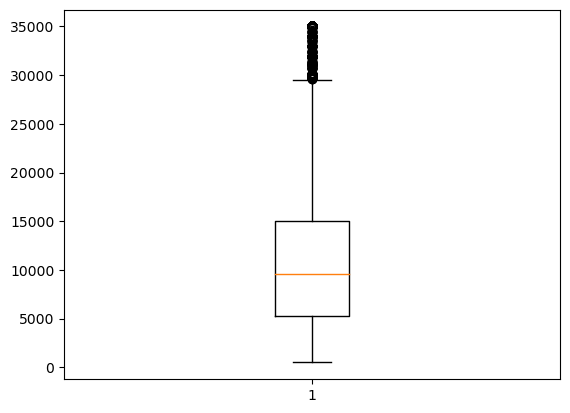

In [29]:
#Plot the box plot on Loan Amount
plt.boxplot(df['loan_amnt'],)
plt.show()

In [30]:
#Bucketing Annual Income and then check if outliers exist
def bucket_annual_inc(column):
    if column <= 40000:
        return '0-40K' #25% quartile
    elif (column>40000) and (column<=50000):
        return '40K-50K'
    elif (column>50000) and (column<=60000):
        return '50K-60K'
    elif (column>60000) and (column<=70000):
        return '60K-70K'
    elif (column>70000) and (column<=80000):
        return '70K-80K'
    else:
        return '80K-above' #75% quartile
    
df['annual_inc_b'] = df.apply(lambda x : bucket_annual_inc(x['annual_inc']),axis=1)

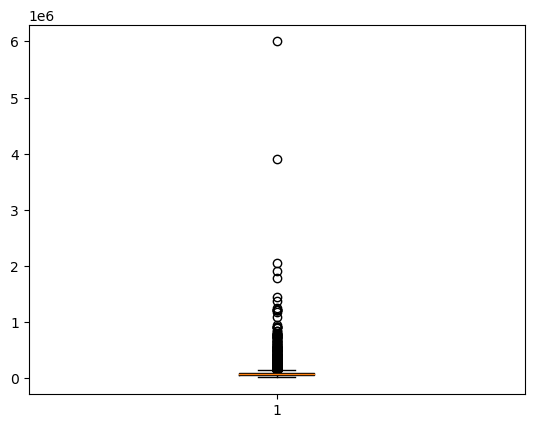

In [34]:
#Plot the box plot on Annual Income
plt.boxplot(df['annual_inc'])
plt.show()

In [35]:
#Bucketing interest rate and then check if outliers exist
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' #25% quartile
    elif (column>9) and (column<=11):
        return 'Low'
    elif (column>11) and (column<=13):
        return 'Moderate'
    elif (column>13) and (column<=15):
        return 'High'
    else:
        return 'Very high' #75% quartile
    
df['int_rate_b'] = df.apply(lambda x : bucket_int_rate(x['int_rate']),axis=1)

In [36]:
#Bucketing dti and then check if outliers exist
def bucket_dti(column):
    if column <=8:
        return 'Very Low' #25% quartile
    elif (column>8) and (column<=12):
        return 'Low'
    elif (column>12) and (column<=16):
        return 'Moderate'
    elif (column>16) and (column<=20):
        return 'High'
    else:
        return 'Very High' #75% quartile
    
df['dti_b'] = df.apply(lambda x : bucket_dti(x.dti),axis =1)

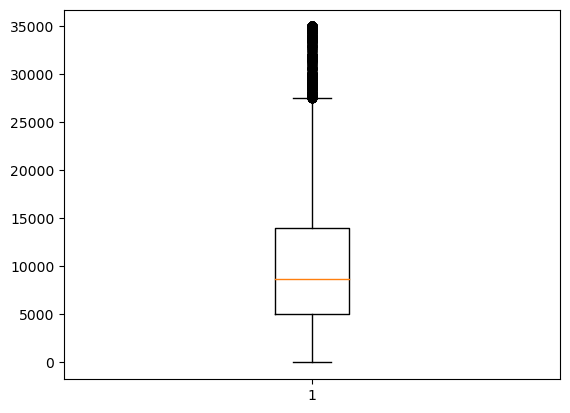

In [38]:
#Plot the box plot on Funded Amount 
plt.boxplot(df['funded_amnt_inv'])
plt.show()

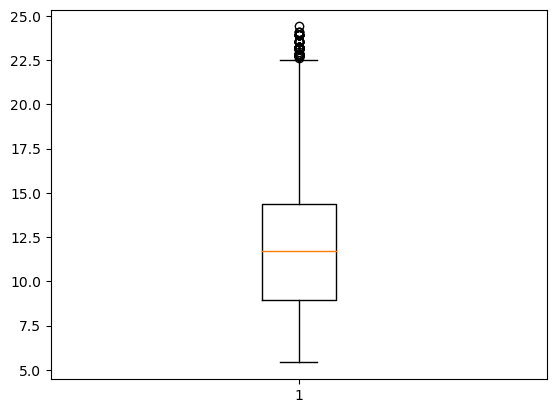

In [40]:
#Plot the box plot on Interest Rate 
plt.boxplot(df['int_rate'])
plt.show()

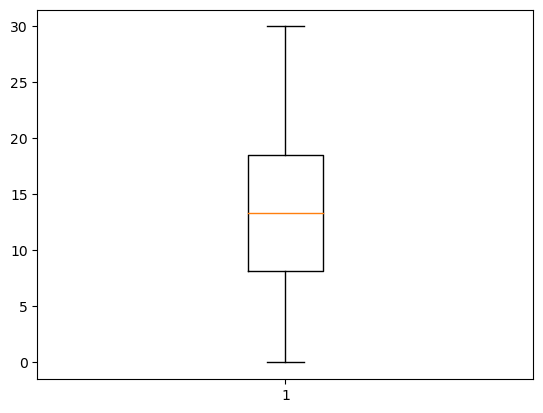

In [41]:
#Plot the box plot on DTI 
plt.boxplot(df['dti'])
plt.show()

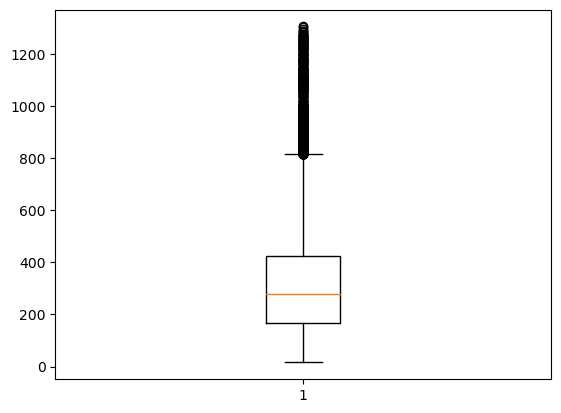

In [42]:
#Plot the box plot on Installment
plt.boxplot(df['installment'])
plt.show()

In [48]:
#From the above plots, we can see there is outliers exists for columns - loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc
outliers_columns_set=['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc']
#define a function to remove outliers based on IQR
def remove_outliers_iqr(data,columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col]<=upper_bound)]
    return data

#Remove outliers from the DataFrame
df = remove_outliers_iqr(df,outliers_columns_set,1.5)

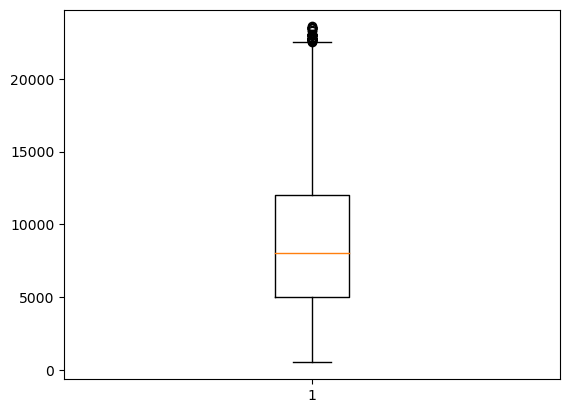

In [49]:
#Plot the box plot on Loan Amount once the outliers are removed
plt.boxplot(df['loan_amnt'])
plt.show()
#Observation: Most of the loan amount applied was in the range of 5k-12k. Max loan applied was 25k

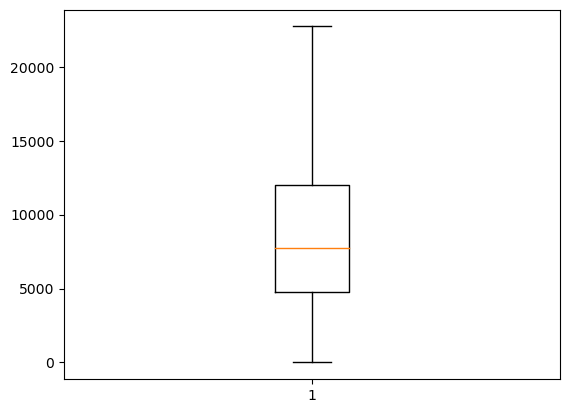

In [51]:
#Plot the box plot on Funded Amount INV once the outliers are removed
plt.boxplot(df['funded_amnt_inv'])
plt.show()
#Observation: Most of the Funded Amount INV applied was in the range of 5k-12k.

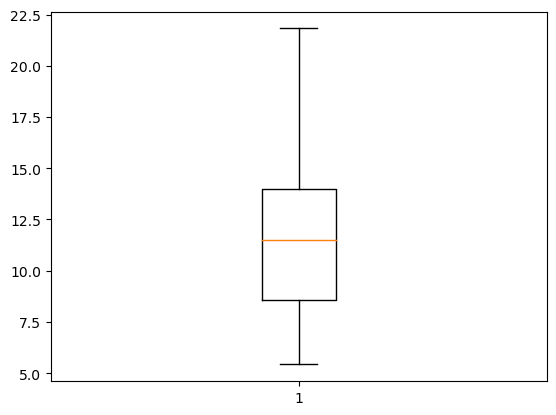

In [52]:
#Plot the box plot on Interest Rate once the outliers are removed
plt.boxplot(df['int_rate'])
plt.show()
#Observation: Most of the people's rate of interest is between 8% to 14%
#Average Rate of Interest is 11.25%

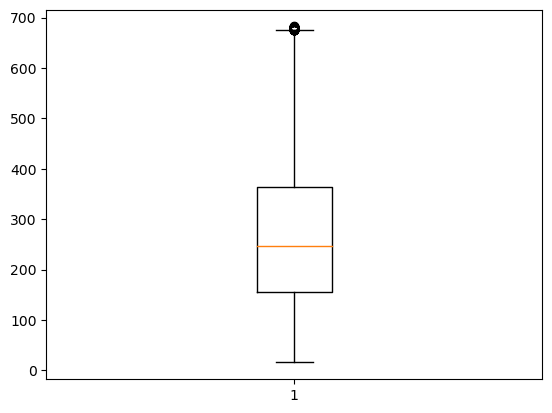

In [53]:
#Plot the box plot on Installment once the outliers are removed
plt.boxplot(df['installment'])
plt.show()

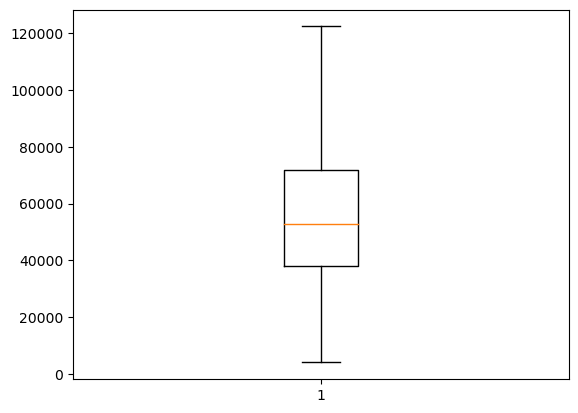

In [54]:
#Plot the box plot on Annual Income once the outliers are removed
plt.boxplot(df['annual_inc'])
plt.show()
#Observation: Most of the people's income ranges between 40k to 75k

In [55]:
df['loan_amnt'].describe()

count    32457.000000
mean      9055.076717
std       5074.008122
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      23600.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='home_ownership'>

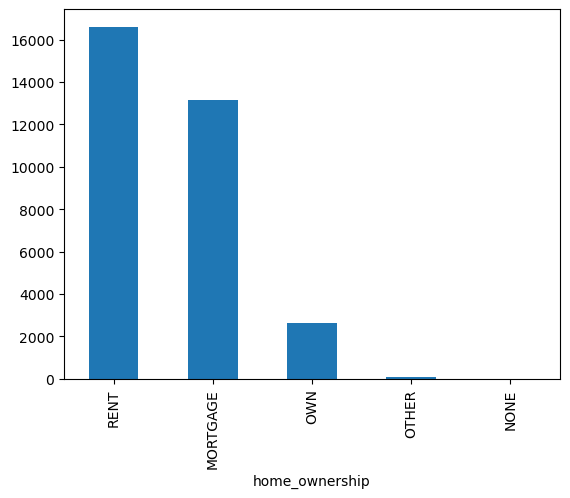

In [56]:
df['home_ownership'].value_counts().plot.bar()
#Observation: People who live on rent is more.

<Axes: xlabel='purpose'>

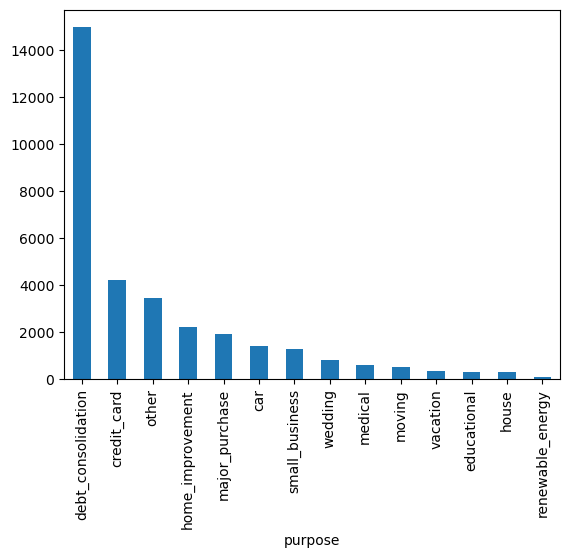

In [57]:
df['purpose'].value_counts().plot.bar()
#Observation: People who has taken loan for Debt Consolidation is more.

<Axes: xlabel='emp_length'>

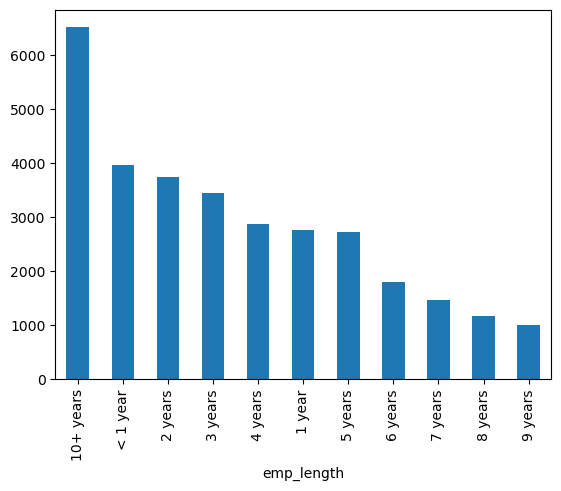

In [59]:
df['emp_length'].value_counts().plot.bar()
#Observation: Most People who take loan have 10+ years of experience.

# Bivariate Analysis

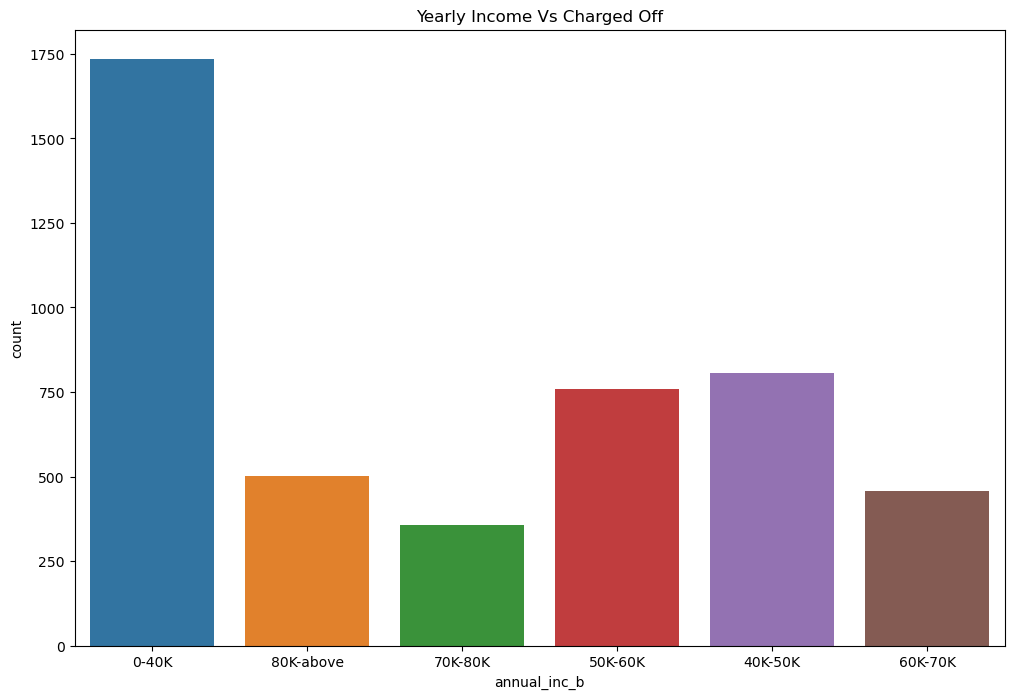

In [60]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Yearly Income Vs Charged Off')
ax1=sns.countplot(x='annual_inc_b', data=df[df['loan_status']=='Charged Off'])
plt.show()
#Observation 1: People who are earning upto 40k per month have high probability to default
#Observation 2: People who earn 70-80 k a month have less chances of default

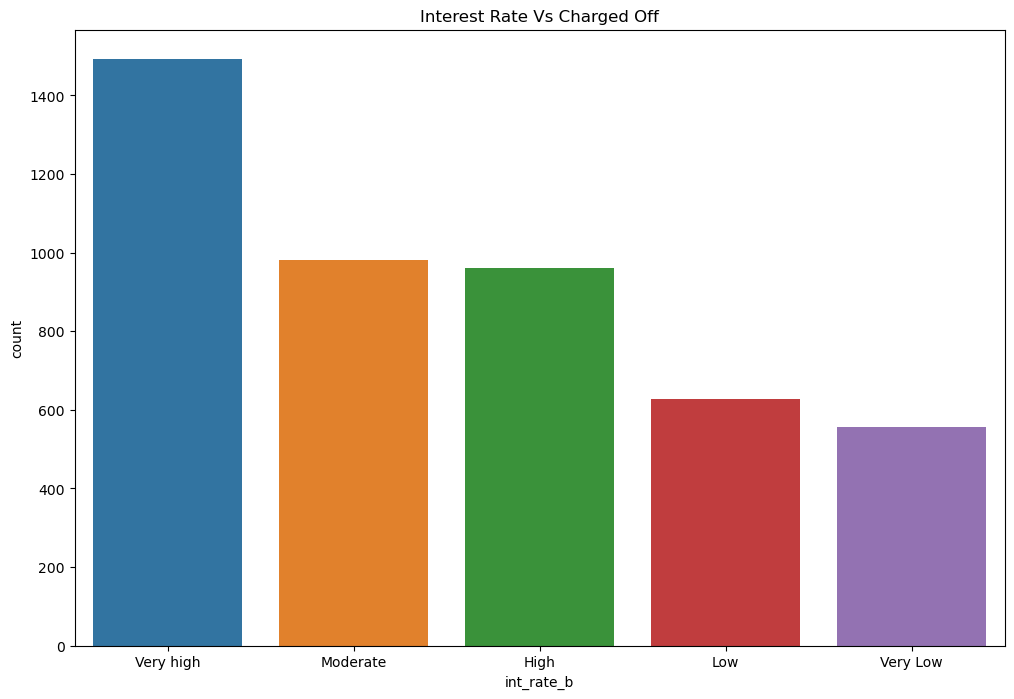

In [61]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Interest Rate Vs Charged Off')
ax1=sns.countplot(x='int_rate_b', data=df[df['loan_status']=='Charged Off'])
plt.show()
#Observation: Applicants having High Interest rates are more probable to default

<Axes: xlabel='home_ownership', ylabel='count'>

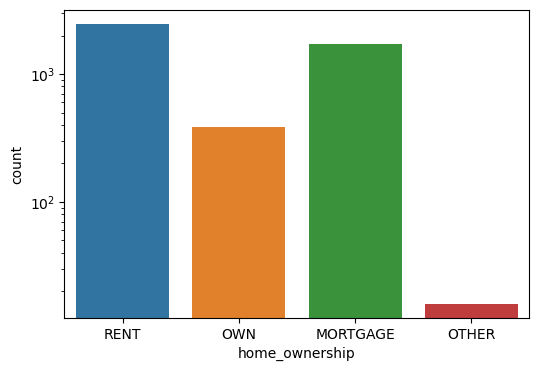

In [62]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])
#Observation: Applicants having house_ownership as 'RENT' or 'MORTGAGE' are more probable to default

<Axes: xlabel='count', ylabel='purpose'>

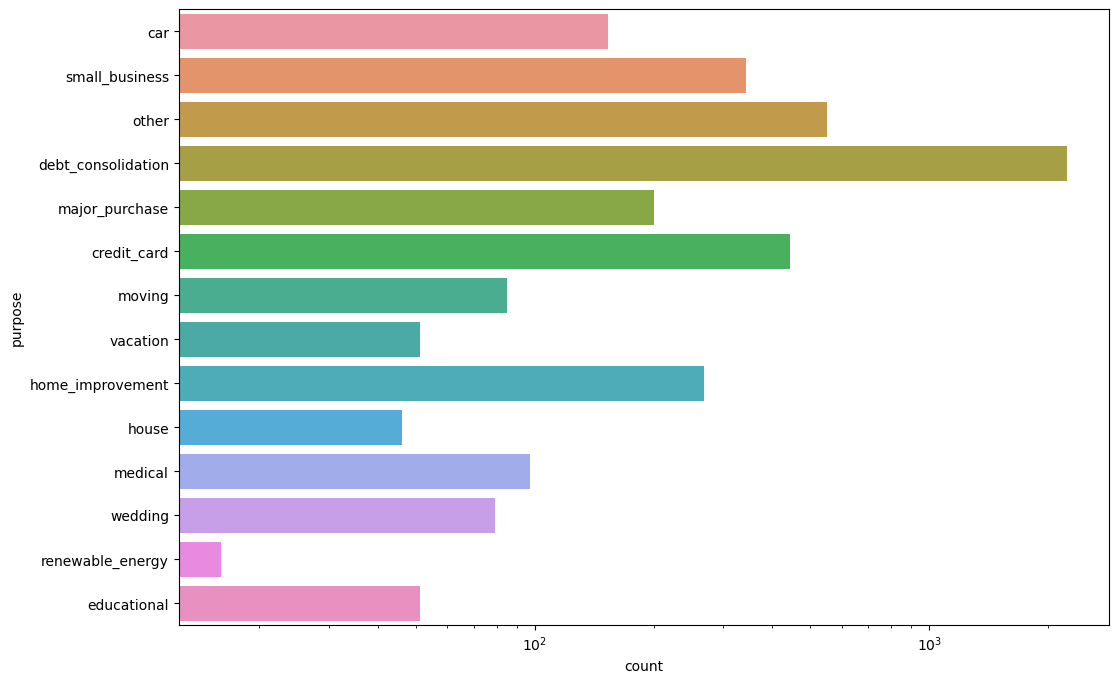

In [65]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=df[df.loan_status == 'Charged Off'])
#Observation: When purpose is 'Debt Consolidation', probability of defaulting is more

<Axes: xlabel='dti_group', ylabel='count'>

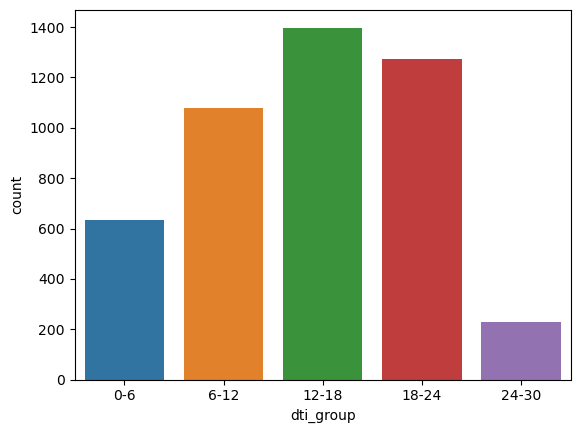

In [66]:
df['dti_group'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
sns.countplot(x='dti_group', data=df[df['loan_status']=='Charged Off'])
#Observation: DTI '12-18' has more probability of defaulting

<Axes: xlabel='issue_year', ylabel='count'>

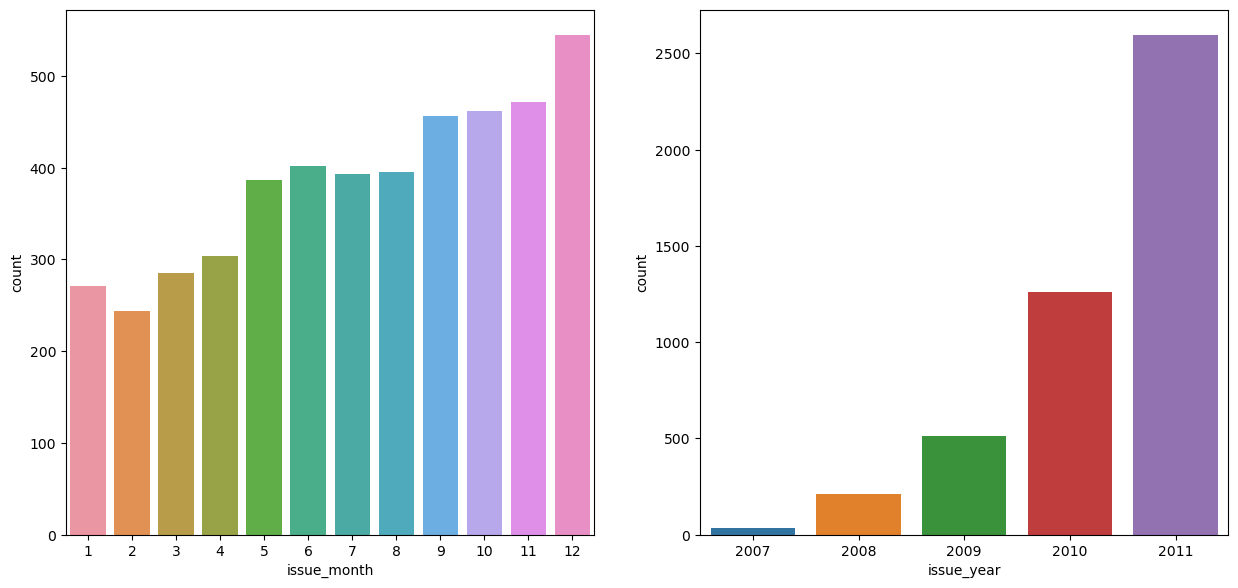

In [72]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=df[df['loan_status']=='Charged Off'])
#Observation1: As it nears end of the year, there is high possibility of defaulting
#Observation2: Maximum number of defaults occured in the year of 2011 

<Axes: xlabel='grade', ylabel='count'>

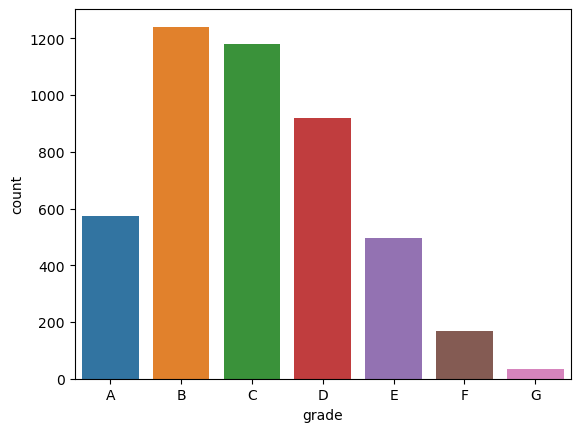

In [73]:
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
#Observation: Grade 'B' has more probability of defaulting

# Analysis using loan_amount

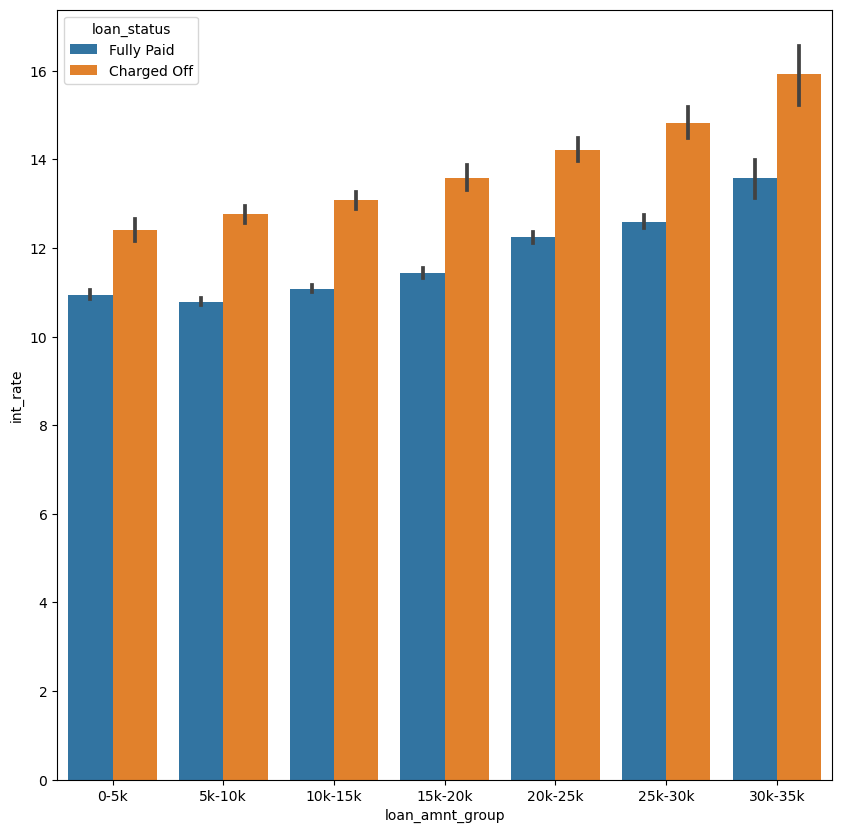

In [84]:
#1.Loan Amount Vs Interest Rate
df['loan_amnt_group'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt_group', y='int_rate', hue ='loan_status')
plt.show()
#Observation: Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17 %

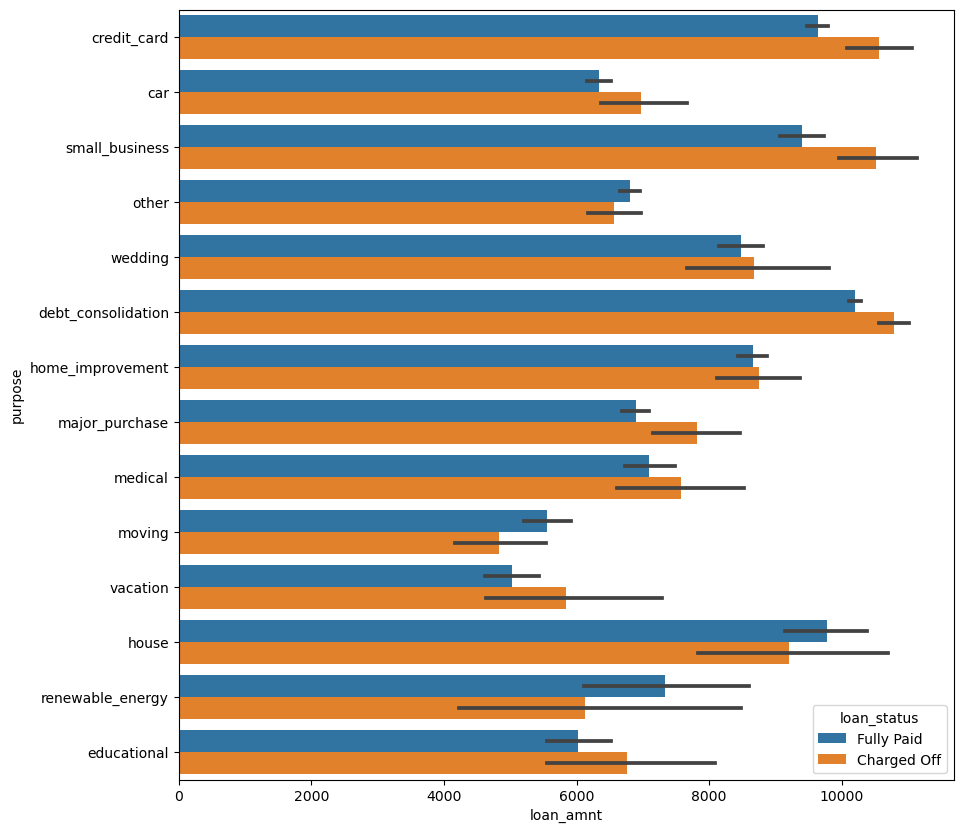

In [77]:
#2.Loan Amount Vs Purpose of Loan
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()
#Observation: People who have taken loan for credit card, small business and debt consolidation with loan amount more than 10k are more probable to default

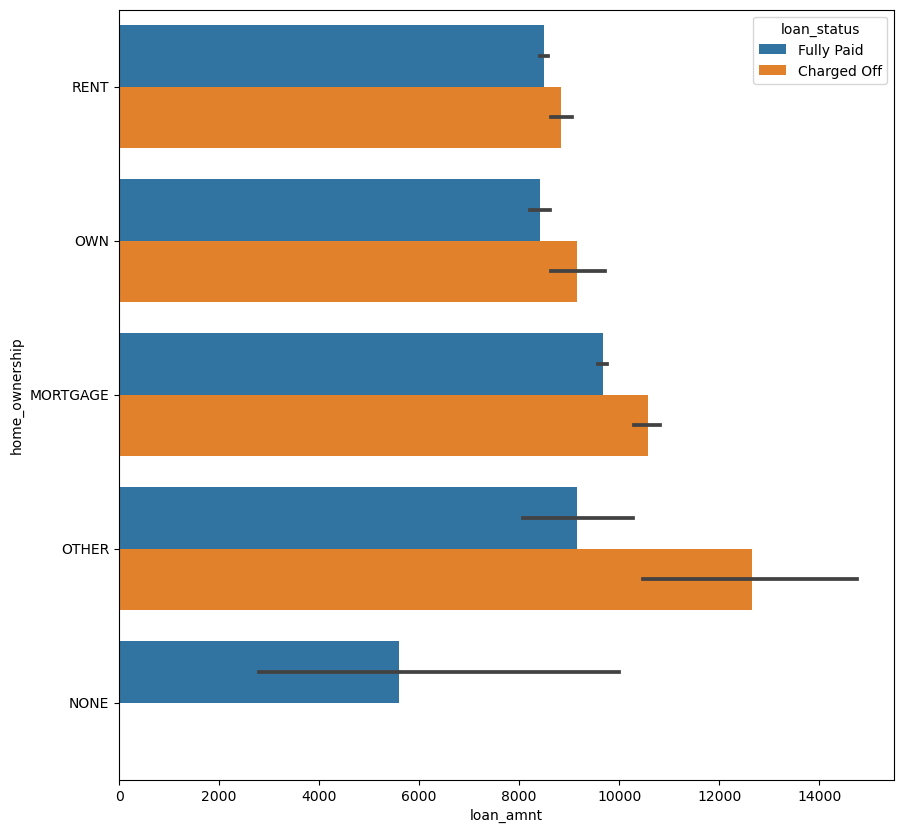

In [78]:
#3. Loan Vs House Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()
#Observation: people whose House Ownership is 'Other' with Loan amount above 13k are likely to default

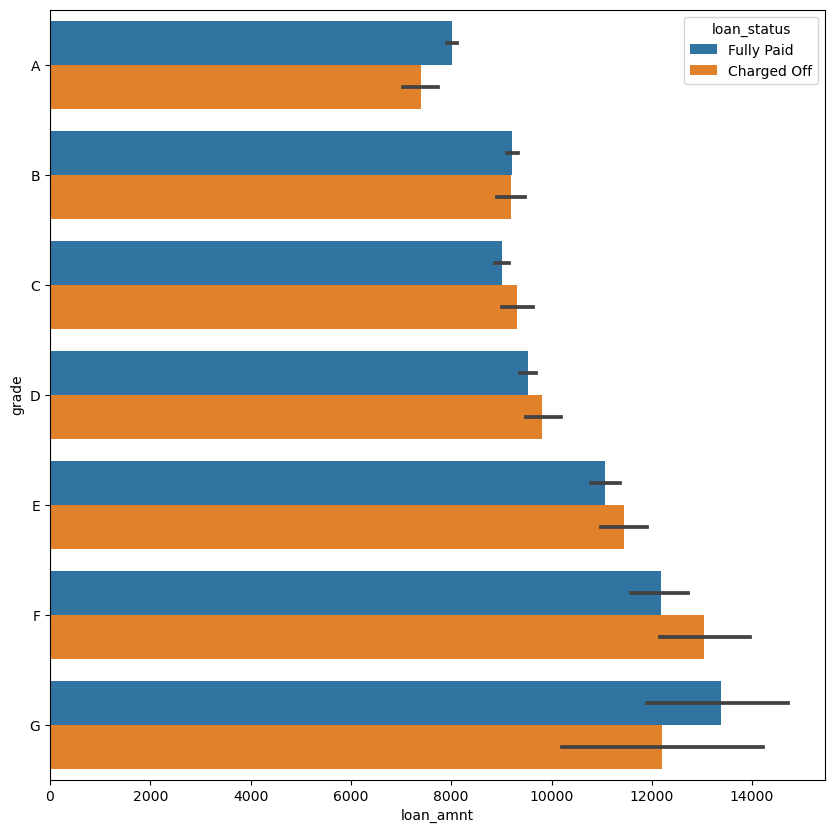

In [79]:
#4. Loan Vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='grade', hue ='loan_status',order=['A','B','C','D','E','F','G'])
plt.show()
#Observation 1: Chances to default is more when grade is F and loan amount is more than 12k
#Observation 2: Conclusions cannot be made with Grade since both F and G have almost 
#similar chances of Fully Paid and Charged Off with high loan amounts

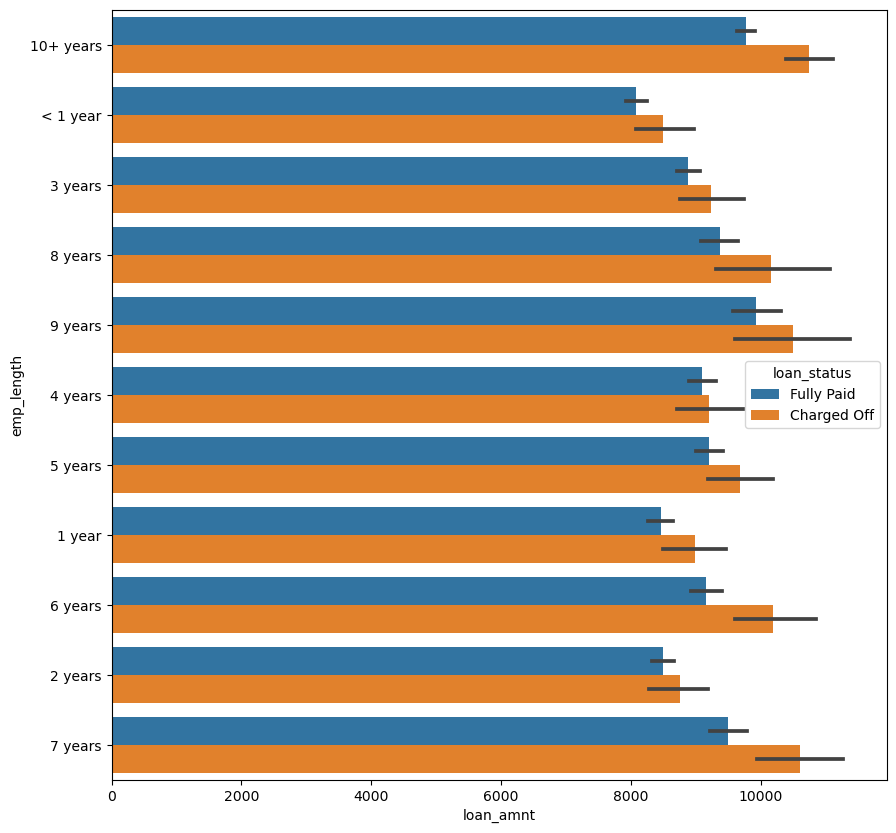

In [80]:
#5. Loan Vs Emp_Length
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='emp_length', hue ='loan_status')
plt.show()
#Observation: Employees whose employment length is more have more loan amount

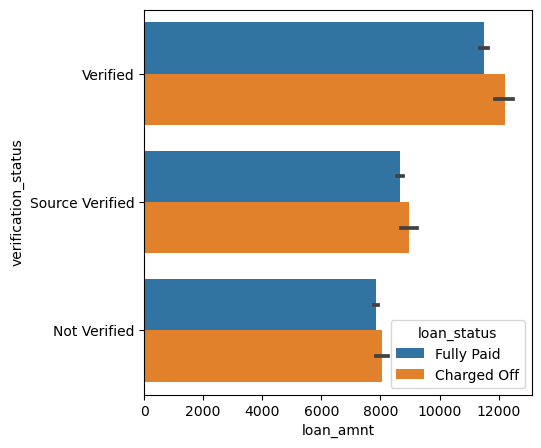

In [82]:
#6. Loan Vs verification_status
plt.figure(figsize=(5,5))
sns.barplot(data =df,x='loan_amnt', y='verification_status', hue ='loan_status')
plt.show()
#Observation: It is defaulted when the loan is verified and loan amount is above 12k